In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.formula.api import ols
from scipy import stats
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [2]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

# Section 3.1 Autoregressive Moving Average Models

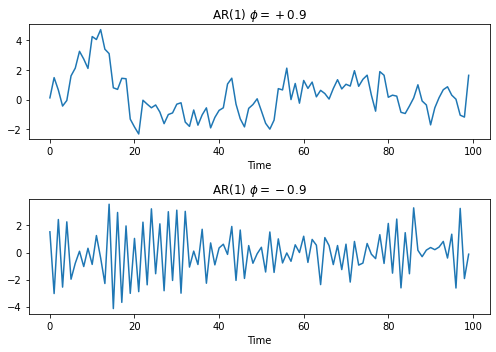

In [3]:
# Example 3.2
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(sm.tsa.arma_generate_sample(ar=[1, -.9], ma=[1, 0], nsample=100))
axes[0].set_xlabel("Time")
axes[0].set_title(r"AR(1) $\phi = +0.9$")
axes[1].plot(sm.tsa.arma_generate_sample(ar=[1, .9], ma=[1, 0], nsample=100))
axes[1].set_xlabel("Time")
axes[1].set_title(r"AR(1) $\phi = -0.9$")
fig.tight_layout()
plt.show()

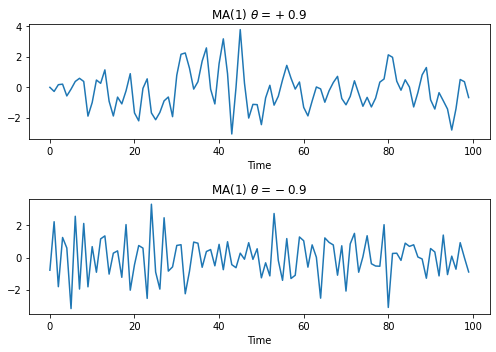

In [4]:
# Example 3.5
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, .9], nsample=100))
axes[0].set_xlabel("Time")
axes[0].set_title(r"MA(1) $\theta = +0.9$")
axes[1].plot(sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, -.9], nsample=100))
axes[1].set_xlabel("Time")
axes[1].set_title(r"MA(1) $\theta = -0.9$")
fig.tight_layout()
plt.show()

In [5]:
# Example 3.7
np.random.seed(8675309) # Jenny, I got your number
x = np.random.normal(loc=5, size=15000) # Jenerate iid N(5, 1)s

mod = sm.tsa.arima.ARIMA(x, order=(1, 0, 1), enforce_invertibility=False, enforce_stationarity=False)
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                15000
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21281.889
Date:                Tue, 18 May 2021   AIC                          42571.778
Time:                        12:39:39   BIC                          42602.241
Sample:                             0   HQIC                         42581.885
                              - 15000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9981      0.008    622.139      0.000       4.982       5.014
ar.L1          0.4020      0.585      0.687      0.492      -0.745       1.549
ma.L1         -0.4118      0.583     -0.707      0.4

In [6]:
# Example 3.8
# leads=11 instead of 10, because Python, unlike R, prints zero-indexed coefficient too
print(tsm.arima_process.arma2ma(ar=[1, -.9], ma=[1, .5], lags=11))
print(tsm.arima_process.arma2ma(ar=[1, .5], ma=[1, -.9], lags=11))

[1.         1.4        1.26       1.134      1.0206     0.91854
 0.826686   0.7440174  0.66961566 0.60265409 0.54238868]
[ 1.         -1.4         0.7        -0.35        0.175      -0.0875
  0.04375    -0.021875    0.0109375  -0.00546875  0.00273437]


# Section 3.2 Difference Equations

In [7]:
# Example 3.11
z = np.array([1, -1.5, .75]) # coefficients of the polynomial
a = np.polynomial.polynomial.polyroots(z)[1] # = 1+0.57735i, print one root which is 1 + i 1/sqrt(3)
arg = np.angle(a)/(2 * np.pi) # arg in cycles/pt
1/arg # = 12, the period

12.0

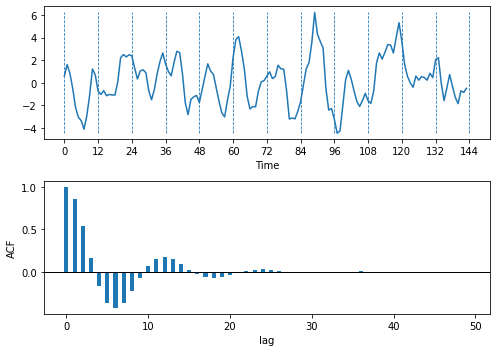

In [8]:
np.random.seed(8675309) # Jenny, it's me again
ar2 = sm.tsa.arma_generate_sample(ar=[1, -1.5, .75], ma=[1, 0], nsample=144)

xlabels = np.arange(0, 144 + 1, 12)
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(ar2)
axes[0].vlines(xlabels, ymin=min(ar2), ymax=max(ar2), linestyles="--", linewidth=.8)
axes[0].set_xticks(xlabels)
axes[0].set_xlabel("Time")

ACF = tsm.arima_process.arma_acf(ar=[1, -1.5, .75], ma=[1, 0], lags=50)
lags = np.arange(0, 50)

axes[1].bar(lags, ACF, width=.5)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].set_xlabel("lag")
axes[1].set_ylabel("ACF")

fig.tight_layout()
plt.show()

In [9]:
# Example 3.12
print(tsm.arima_process.arma2ma(ar=[1, -.9], ma=[1, .5], lags=51))

[1.         1.4        1.26       1.134      1.0206     0.91854
 0.826686   0.7440174  0.66961566 0.60265409 0.54238868 0.48814982
 0.43933483 0.39540135 0.35586122 0.32027509 0.28824758 0.25942283
 0.23348054 0.21013249 0.18911924 0.17020732 0.15318658 0.13786793
 0.12408113 0.11167302 0.10050572 0.09045515 0.08140963 0.07326867
 0.0659418  0.05934762 0.05341286 0.04807157 0.04326442 0.03893797
 0.03504418 0.03153976 0.02838578 0.02554721 0.02299248 0.02069324
 0.01862391 0.01676152 0.01508537 0.01357683 0.01221915 0.01099723
 0.00989751 0.00890776 0.00801698]


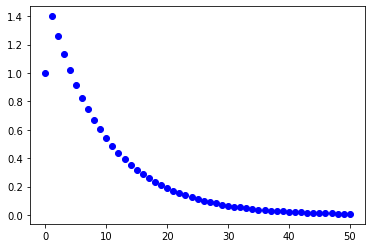

In [10]:
plt.plot(tsm.arima_process.arma2ma(ar=[1, -.9], ma=[1, .5], lags=51), "bo")
plt.show()

# Section 3.3 Autocorrelation and Partial Autocorrelation

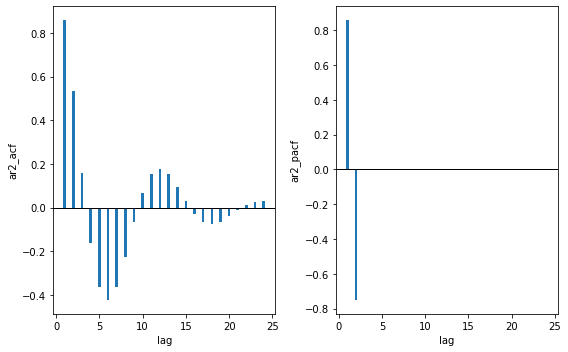

In [11]:
# Example 3.16
ar2_acf = tsm.arima_process.arma_acf(ar=[1, -1.5, .75], ma=[1, 0], lags=25)[1:]
ar2_pacf = tsm.arima_process.arma_pacf(ar=[1, -1.5, .75], ma=[1, 0], lags=25)[1:]
lags = np.arange(1, 25)

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
axes[0].bar(lags, ar2_acf, width=.3)
axes[0].axhline(0, color="black", linewidth=1)
axes[0].set_xlabel("lag")
axes[0].set_ylabel("ar2_acf")

axes[1].bar(lags, ar2_pacf, width=.3)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].set_xlabel("lag")
axes[1].set_ylabel("ar2_pacf")

fig.tight_layout()
plt.show()

In [12]:
# Example 3.18
print(sm.tsa.acf(rec, nlags=48, fft=False)[1:], "\n")
print(sm.tsa.pacf(rec, nlags=48)[1:])

[ 0.92180421  0.78291817  0.62699624  0.47734917  0.35543191  0.25928198
  0.1824141   0.126923    0.09365357  0.07410671  0.05711484  0.0239486
 -0.03710841 -0.11579969 -0.1877115  -0.23996874 -0.2668297  -0.26777909
 -0.2412331  -0.18507433 -0.1097977  -0.0334266   0.03031228  0.06428622
  0.05662246  0.02101004 -0.01831943 -0.0585743  -0.09314434 -0.11844084
 -0.12504868 -0.10636648 -0.05417787  0.01962291  0.08477073  0.11615412
  0.10277312  0.05791282  0.0096687  -0.01966107 -0.03336518 -0.0331922
 -0.02047722  0.01143469  0.05929651  0.11710424  0.1743476   0.20495483] 

[ 0.9238436  -0.45795879 -0.04275725 -0.01592385  0.07715979 -0.03326433
 -0.03220548  0.03921676  0.05028842 -0.02102956 -0.0585199  -0.1485316
 -0.15525155 -0.05387466  0.05889749  0.00949503  0.0057794   0.02564797
  0.0952969   0.11788724  0.0284908  -0.03251751 -0.00856125 -0.07383949
 -0.13183565 -0.03238931  0.05172264 -0.09371912 -0.04471695 -0.03044726
  0.07252379  0.05531913  0.16682644  0.1050421  -0

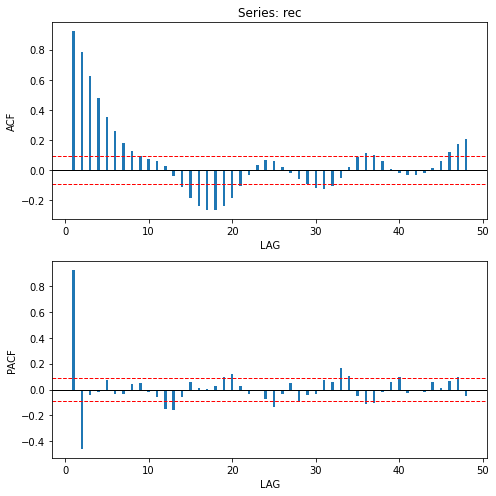

In [13]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 7))

acf1(rec, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Series: rec")

acf1(rec, nlags=48, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

In [14]:
regr = sm.tsa.AutoReg(rec, lags=2).fit()
print(regr.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  453
Model:                     AutoReg(2)   Log Likelihood               -1653.938
Method:               Conditional MLE   S.D. of innovations              9.472
Date:                Tue, 18 May 2021   AIC                              4.514
Time:                        12:39:41   BIC                              4.551
Sample:                    03-31-1950   HQIC                             4.529
                         - 09-30-1987                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7371      1.111      6.066      0.000       4.560       8.914
value.L1       1.3541      0.042     32.403      0.000       1.272       1.436
value.L2      -0.4632      0.042    -11.060      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


# Seciton 3.4 Forecasting

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


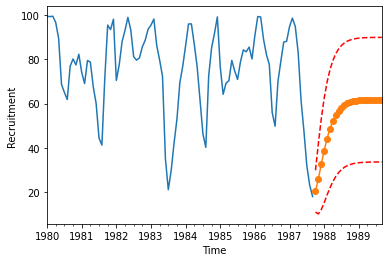

In [15]:
# Example 3.25
regr = sm.tsa.AutoReg(rec, lags=2).fit()
fore = regr.get_prediction(start=len(rec), end=len(rec) + 23)

rec["1980":].plot(xlabel="Time", ylabel="Recruitment", legend=False)
fore.predicted_mean.plot(marker="o")
plt.plot(fore.predicted_mean + fore.se_mean, color="red", linestyle="--")
plt.plot(fore.predicted_mean - fore.se_mean, color="red", linestyle="--")
plt.show()

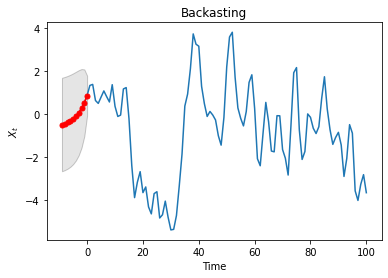

In [16]:
# Example 3.26
np.random.seed(90210)
x = sm.tsa.arma_generate_sample(ar=[1, -.9], ma=[1, .5], nsample=100)
xr = np.flip(x) # xr is the reversed data
pxr = sm.tsa.arima.ARIMA(xr, order=(1, 0, 1), enforce_stationarity=False, enforce_invertibility=False).fit().get_prediction(len(x), len(x) + 9) # predict the reversed data
pxrp = np.flip(pxr.predicted_mean) # reorder the predictors (for plotting)
pxrse = np.flip(pxr.se_mean) # reorder the SEs
nx = pd.Series([*pxrp, *x], index=np.arange(-9, 101)) # attach the backcasts to the data

nx.plot(xlabel="Time", ylabel=r"$X_{t}$", title="Backasting")
nx.iloc[:10].plot(marker="o", color="red", markersize=5)
U = nx.iloc[:10] + pxrse; L = nx.iloc[:10] - pxrse
plt.fill_between(nx.index[:10], L, U, facecolor="gray", edgecolor="black", alpha=.2)
plt.show()

# Section 3.5 Estimation

In [17]:
# Example 3.28
rec_ar = sm.tsa.arima.ARIMA(rec, order=(2, 0, 0), enforce_stationarity=False, enforce_invertibility=False).fit(method="yule_walker")
print(rec_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  453
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1654.336
Date:                Tue, 18 May 2021   AIC                           3316.671
Time:                        12:39:41   BIC                           3333.117
Sample:                    01-31-1950   HQIC                          3323.152
                         - 09-30-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8960      4.233     14.622      0.000      53.599      70.193
ar.L1          1.3318      0.043     30.894      0.000       1.247       1.416
ar.L2         -0.4447      0.039    -11.325      0.0

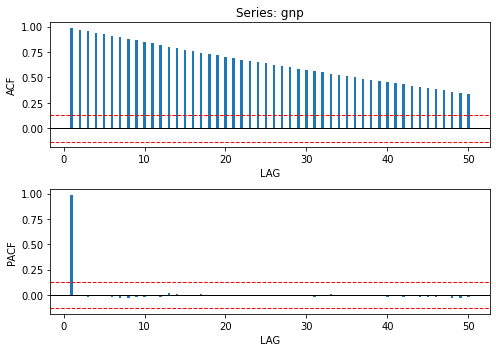

In [18]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(gnp, nlags=50, ax=axes[0], width=.3)
axes[0].set_title("Series: gnp")

acf1(gnp, nlags=50, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

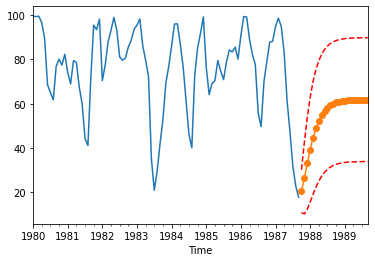

In [19]:
rec_pr = rec_ar.get_prediction(start=len(rec), end=len(rec) + 23)
U = rec_pr.predicted_mean + rec_pr.se_mean
L = rec_pr.predicted_mean - rec_pr.se_mean

rec["1980":].plot(xlabel="Time", legend=False)
rec_pr.predicted_mean.plot(marker="o")
plt.plot(U, color="red", linestyle="--")
plt.plot(L, color="red", linestyle="--")
plt.show()

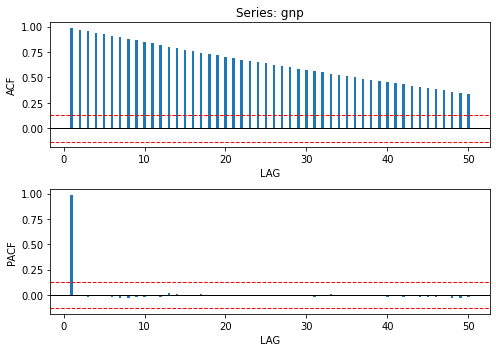

In [20]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(gnp, nlags=50, ax=axes[0], width=.3)
axes[0].set_title("Series: gnp")

acf1(gnp, nlags=50, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

In [21]:
# Example 3.29
np.random.seed(2)
ma1 = sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, .9], nsample=50)
acf_1 = sm.tsa.acf(ma1, nlags=1, fft=False)[1:] # = .348 (lag 1 sample ACF)
print(acf_1)

[0.34800403]


In [22]:
#-------------------- Maximum likelihood --------------------- 
# Example 3.31
rec_mle = sm.tsa.arima.ARIMA(rec, order=(2, 0, 0), enforce_stationarity=False, enforce_invertibility=False).fit(method="innovations_mle")
print(rec_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  453
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1653.944
Date:                Tue, 18 May 2021   AIC                           3315.889
Time:                        12:39:43   BIC                           3332.334
Sample:                    01-31-1950   HQIC                          3322.370
                         - 09-30-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.8949      4.127     14.997      0.000      53.806      69.984
ar.L1          1.3512      0.041     32.832      0.000       1.271       1.432
ar.L2         -0.4612      0.037    -12.389      0.0

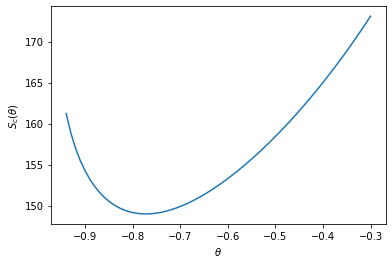

In [23]:
# Example 3.33
x = varve.apply(np.log).diff().dropna()
# Evaluate Sc on a Grid
num = x.shape[0]
w = np.zeros(num)
Sc = np.array([])
th = np.arange(-.3, -.95, -.01)

for p in np.arange(len(th)):
    for i in np.arange(1, num):
        w[i] = x.iloc[i] - th[p] * w[i-1]
    Sc = np.append(Sc, np.sum(w**2))

plt.plot(th, Sc)
plt.ylabel(r"$S_{c}(\theta)$")
plt.xlabel(r"$\theta$")
plt.show()

In [24]:
# Gauss-Newton Estimation
r = sm.tsa.acf(x, nlags=1, fft=False)[1:]
rstart = (1 - np.sqrt(1 - 4 * (r**2))) / (2 * r) # from (3.105)
w = np.zeros(num)
z = np.zeros(num)
Sc_1 = np.array([])
Sz = np.array([])
Szw = np.array([])
para = np.array([])
para = np.append(para, rstart)
niter = 12

for p in np.arange(niter):
    for i in np.arange(1, num):
        w[i] = x.iloc[i] - para[p] * w[i-1]
        z[i] = w[i-1] - para[p] * z[i-1]
    Sc_1 = np.append(Sc_1, np.sum(w**2))
    Sz = np.append(Sz, np.sum(z**2))
    Szw = np.append(Szw, np.sum(z * w))
    para = np.append(para, para[p] + Szw[p]/Sz[p])

pd.DataFrame({"iteration": np.arange(12), "thetahat": para[:niter], "Sc": Sc_1, "Sz": Sz}).round(3)

,iteration,thetahat,Sc,Sz
0,0,-0.495,158.739,171.240
1,1,-0.668,150.747,235.266
2,2,-0.733,149.264,300.562
3,3,-0.756,149.031,336.823
4,4,-0.766,148.990,354.173
5,5,-0.769,148.982,362.167
6,6,-0.771,148.980,365.801
7,7,-0.772,148.980,367.446
8,8,-0.772,148.980,368.188
9,9,-0.772,148.980,368.522


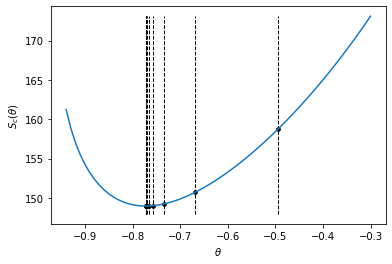

In [25]:
plt.plot(th, Sc)
plt.scatter(para[:niter], Sc_1, s=13, color="black")
plt.vlines(para[:niter], ymin=min(Sc) - 1, ymax=max(Sc), color="black", linestyles="--", linewidth=1)
plt.ylabel(r"$S_{c}(\theta)$")
plt.xlabel(r"$\theta$")
plt.show()

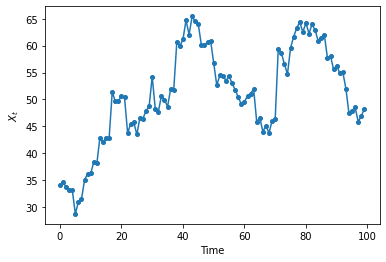

In [26]:
# Example 3.36
np.random.seed(101010)

def innov(size):
    e = np.random.exponential(scale=2, size=size)
    u = np.random.uniform(low=-1, high=1, size=size)
    return e * np.sign(u)

dex = 50 + sm.tsa.arma_generate_sample(ar=[1, -.95], ma=[1, 0], nsample=100, burnin=50, distrvs=innov)

plt.plot(dex, marker="o", markersize=4)
plt.xlabel("Time")
plt.ylabel(r"$X_{t}$")
plt.show()

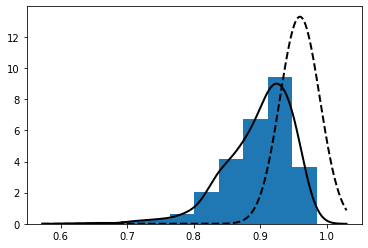

In [27]:
# small sample and asymptotic distn
np.random.seed(111)
phi_yw = np.empty(1000)

for i in np.arange(1000):
    x = 50 + sm.tsa.arma_generate_sample(ar=[1, -.95], ma=[1, 0], nsample=100, distrvs=innov, burnin=50)
    phi_yw[i] = sm.tsa.arima.ARIMA(x, order=(1, 0, 0), enforce_stationarity=False, enforce_invertibility=False).fit(method="yule_walker").arparams

kde = sm.nonparametric.KDEUnivariate(phi_yw).fit(bw=.015)

plt.hist(phi_yw, density=True)
plt.plot(kde.support, kde.density, lw=2, color="black")

true_values = stats.norm.pdf(loc=.96, scale=.03, x=kde.support) 
plt.plot(kde.support, true_values, lw=2, color="black", linestyle="--")
plt.show()

In [28]:
# Bootstrap
np.random.seed(666) # not that 666
fit = sm.tsa.arima.ARIMA(dex, order=(1, 0, 0), enforce_stationarity=False, enforce_invertibility=False).fit(method="yule_walker")
m = fit.params[0] # estimate of mean
phi = fit.arparams # estimate of phi
nboot = 250 # number of bootstrap replicates
resids = fit.resid[1:] # the 99 innovations
x_star = dex # initialize x*
phi_star_yw = np.zeros(nboot)

for i in np.arange(nboot):
    resid_star = np.random.choice(resids, size=len(resids))
    for t in np.arange(99):
        x_star[t+1] = m + phi * (x_star[t] - m) + resid_star[t]
    phi_star_yw[i] = sm.tsa.arima.ARIMA(x_star, order=(1, 0, 0), enforce_stationarity=False, enforce_invertibility=False).fit(method="yule_walker").arparams

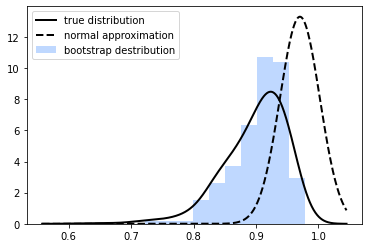

In [29]:
# Picture
kde = sm.nonparametric.KDEUnivariate(phi_yw).fit(bw=.02)

plt.hist(phi_star_yw, color=(.5, .7,1, .5), density=True, label="bootstrap destribution")
plt.plot(kde.support, kde.density, lw=2, color="black", label="true distribution")

plt.plot(kde.support, true_values, lw=2, color="black", linestyle="--", label="normal approximation")
plt.legend()
plt.show()

# Section 3.6 Integrated Models for Nonstationary Data

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


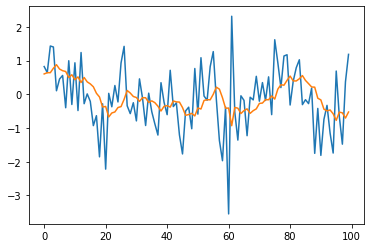

In [30]:
# Example 3.38
np.random.seed(666)
x = np.cumsum(sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, -.8], nsample=100))
x_ima = sm.tsa.ExponentialSmoothing(x).fit()
plt.plot(x)
plt.plot(x_ima.fittedvalues)
plt.show()

# Section 3.7 Building ARIMA Models

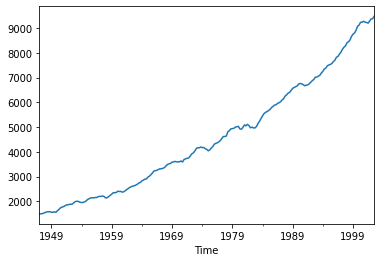

In [31]:
# Example 3.39, 3.40 and 3.43
gnp.plot(xlabel="Time", legend=False)
plt.show()

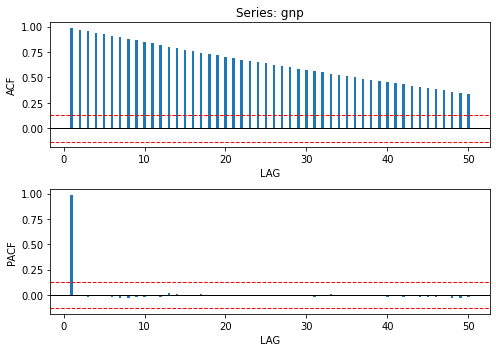

In [32]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(gnp, nlags=50, ax=axes[0], width=.3)
axes[0].set_title("Series: gnp")

acf1(gnp, nlags=50, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

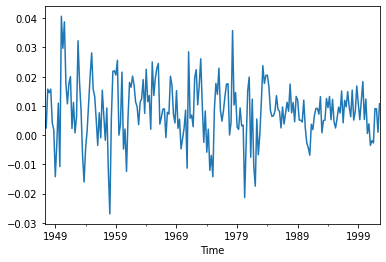

In [33]:
gnpgr = gnp.apply(np.log).diff().dropna()

gnpgr.plot(xlabel="Time", legend=False)
plt.show()

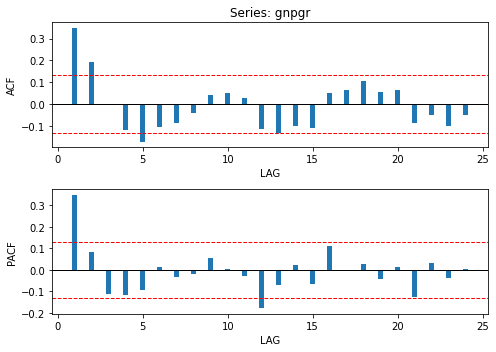

In [34]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(gnpgr, nlags=24, ax=axes[0], width=.3)
axes[0].set_title("Series: gnpgr")

acf1(gnpgr, nlags=24, pacf=True, ax=axes[1], width=.3)
 
fig.tight_layout()
plt.show()

In [35]:
ar_1 = sm.tsa.SARIMAX(gnpgr, order=(1, 0, 0), trend="c").fit()
print(ar_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  222
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 718.610
Date:                Tue, 18 May 2021   AIC                          -1431.220
Time:                        12:40:14   BIC                          -1421.012
Sample:                    06-30-1947   HQIC                         -1427.099
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0054      0.001      7.626      0.000       0.004       0.007
ar.L1          0.3481      0.055      6.289      0.000       0.240       0.457
sigma2      9.021e-05   6.47e-06     13.946      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


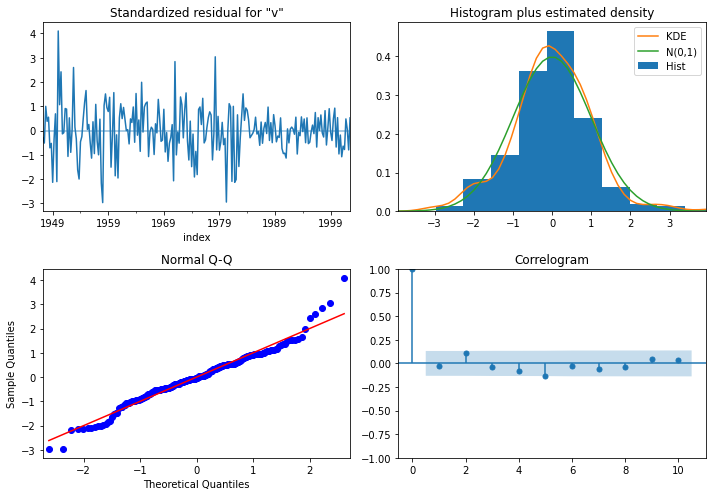

In [36]:
fig = ar_1.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [37]:
ma_2 = sm.tsa.SARIMAX(gnpgr, order=(0, 0, 2), trend="c").fit()
print(ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  222
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 719.965
Date:                Tue, 18 May 2021   AIC                          -1431.929
Time:                        12:40:15   BIC                          -1418.319
Sample:                    06-30-1947   HQIC                         -1426.434
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.001      8.531      0.000       0.006       0.010
ma.L1          0.3028      0.055      5.542      0.000       0.196       0.410
ma.L2          0.2036      0.056      3.650      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


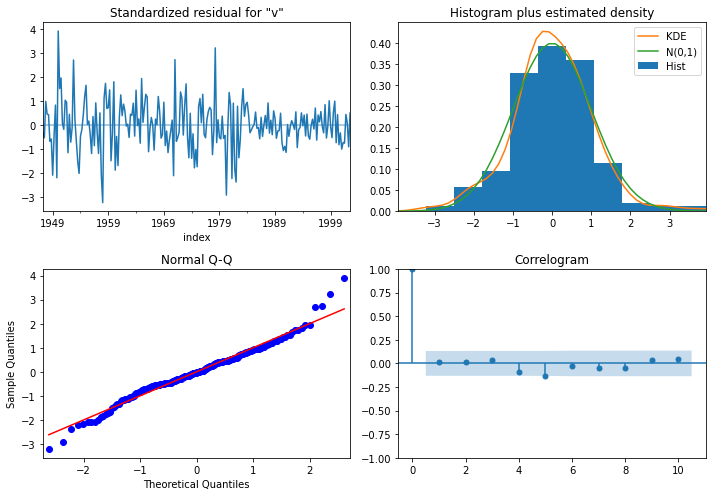

In [38]:
fig = ma_2.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [39]:
tsm.arima_process.arma2ma(ar=[1, -.35], ma=[1, 0], lags=11)

array([1.00000000e+00, 3.50000000e-01, 1.22500000e-01, 4.28750000e-02,
       1.50062500e-02, 5.25218750e-03, 1.83826562e-03, 6.43392969e-04,
       2.25187539e-04, 7.88156387e-05, 2.75854735e-05])

In [40]:
# Example 3.41
model_1 = sm.tsa.SARIMAX(varve.apply(np.log), order=(0, 1, 1)).fit() # ARIMA(0, 1, 1)
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  634
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -440.718
Date:                Tue, 18 May 2021   AIC                            885.435
Time:                        12:40:16   BIC                            894.336
Sample:                      12-31-01   HQIC                           888.892
                          - 12-31-634                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7705      0.023    -32.948      0.000      -0.816      -0.725
sigma2         0.2353      0.012     19.124      0.000       0.211       0.259
Ljung-Box (L1) (Q):                   9.10   Jarque-

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


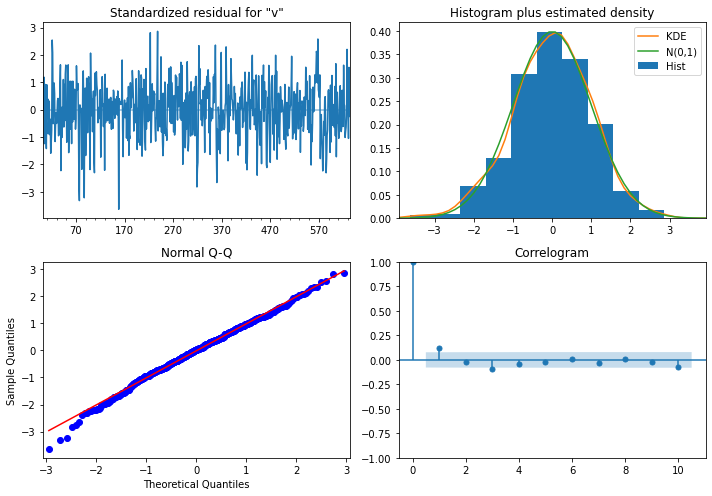

In [41]:
fig = model_1.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [42]:
model_2 = sm.tsa.SARIMAX(varve.apply(np.log), order=(1, 1, 1)).fit() # ARIMA(1, 1, 1)
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  634
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -431.438
Date:                Tue, 18 May 2021   AIC                            868.875
Time:                        12:40:17   BIC                            882.226
Sample:                      12-31-01   HQIC                           874.060
                          - 12-31-634                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2330      0.044      5.310      0.000       0.147       0.319
ma.L1         -0.8858      0.020    -43.608      0.000      -0.926      -0.846
sigma2         0.2284      0.012     18.727      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


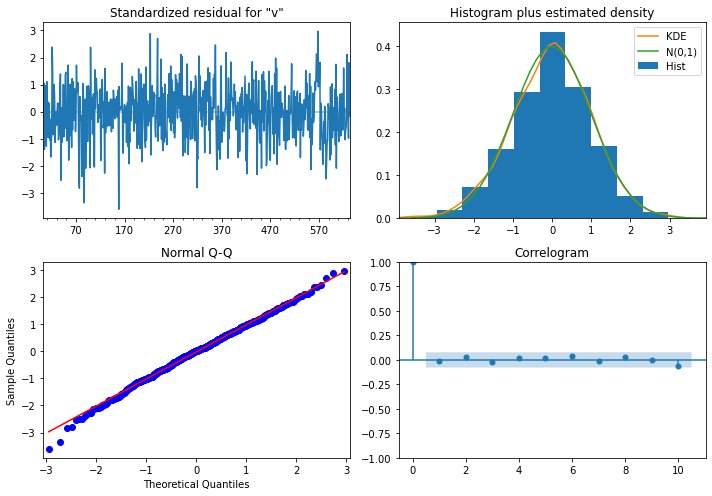

In [43]:
fig = model_2.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

# Section 3.8 Regression with Autocorrelated Errors

In [44]:
# Example 3.44
trend = pd.Series([idx.ordinal for idx in cmort.index], index=cmort.index)
temp = tempr - tempr.mean()
temp2 = temp**2
reg_data = pd.concat([trend, temp, temp2, part], axis=1)
reg_data.columns = ["trend", "temp", "temp2", "part"]

fit = ols("cmort ~ trend + temp + temp2 + part", data=reg_data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  cmort   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.20e-97
Time:                        12:40:18   Log-Likelihood:                -1660.1
No. Observations:                 508   AIC:                             3330.
Df Residuals:                     503   BIC:                             3351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.5931      1.102     74.032      0.0

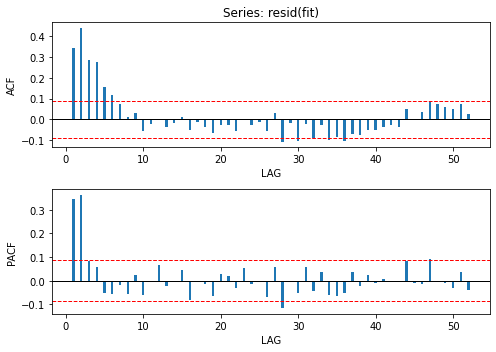

In [45]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(fit.resid, nlags=52, ax=axes[0], width=.3)
axes[0].set_title("Series: resid(fit)")

acf1(fit.resid, nlags=52, pacf=True, ax=axes[1], width=.3)
 
fig.tight_layout()
plt.show()

In [46]:
fit = sm.tsa.SARIMAX(cmort, reg_data.loc[:, reg_data.columns != "cmort"], order=(2, 0, 0)).fit()
print(fit.summary())
# The coefficients are a bit different to the ones of R.
# Perhaps, different defaults. 

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  508
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1569.789
Date:                Tue, 18 May 2021   AIC                           3153.579
Time:                        12:40:19   BIC                           3183.192
Sample:                    01-04-1970   HQIC                          3165.191
                         - 10-07-1979                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.1985      0.057      3.472      0.001       0.086       0.311
temp           0.0485      0.044      1.107      0.268      -0.037       0.134
temp2          0.0170      0.002      8.704      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


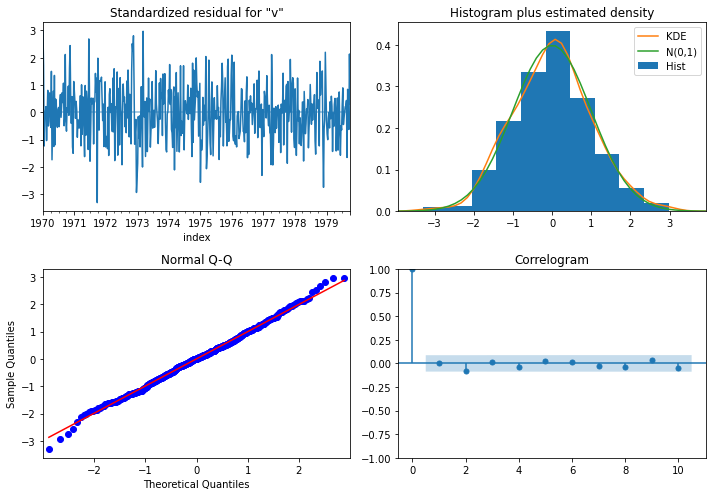

In [47]:
fig = fit.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

In [48]:
# Example 3.45
# Note: this could benefit from a seasonal model fit, but it hasn't
# been talked about yet - you could come back to this after the next section
dummy = pd.Series(np.where(soi.iloc[:, 0] < 0, 0, 1), index=soi.index)
fish = pd.concat([rec, soi.shift(6), dummy.shift(6)], axis=1).dropna()
fish.columns = ["rec", "soiL6", "dL6"]

fit = ols("rec ~ soiL6 * dL6", data=fish).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    rec   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     99.43
Date:                Tue, 18 May 2021   Prob (F-statistic):           3.20e-49
Time:                        12:40:20   Log-Likelihood:                -2010.7
No. Observations:                 447   AIC:                             4029.
Df Residuals:                     443   BIC:                             4046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4794      2.865     25.998      0.0

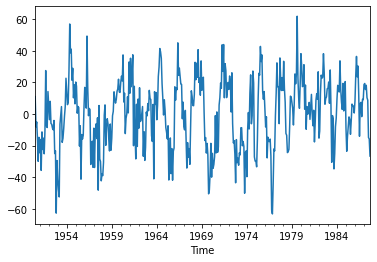

In [49]:
fit.resid.plot(xlabel="Time")
plt.show()

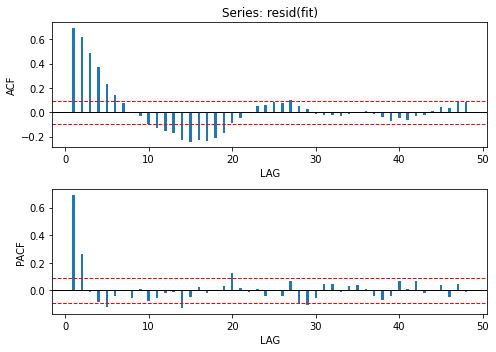

In [50]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(fit.resid, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Series: resid(fit)")

acf1(fit.resid, nlags=48, pacf=True, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

In [51]:
fish.loc[:, "intract"] = fish.loc[:, "soiL6"] * fish.loc[:, "dL6"]
fit = sm.tsa.SARIMAX(fish.loc[:, "rec"], fish.loc[:, fish.columns != "rec"], order=(2, 0, 0)).fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    rec   No. Observations:                  447
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1652.120
Date:                Tue, 18 May 2021   AIC                           3316.240
Time:                        12:40:21   BIC                           3340.855
Sample:                    07-31-1950   HQIC                          3325.945
                         - 09-30-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
soiL6          7.5289      2.309      3.260      0.001       3.003      12.055
dL6           -2.4440      0.966     -2.531      0.011      -4.337      -0.551
intract       -9.6710      2.808     -3.444      0.0

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


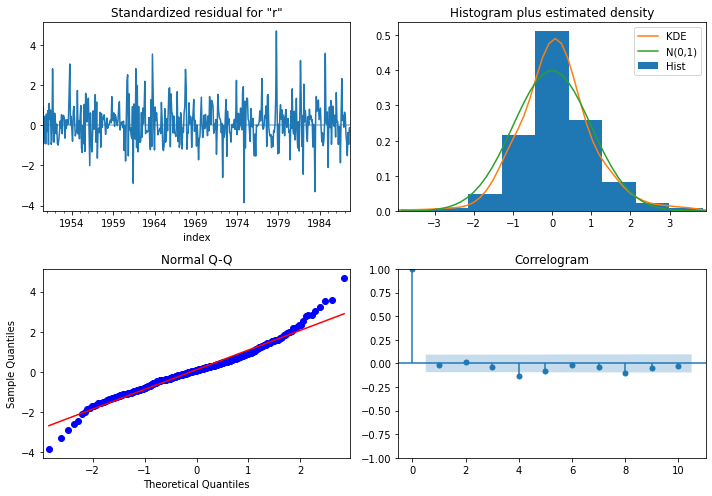

In [52]:
fig = fit.plot_diagnostics(figsize=(10, 7))
fig.tight_layout()
plt.show()

# Section 3.9 Multiplicative Seasonal ARIMA Models

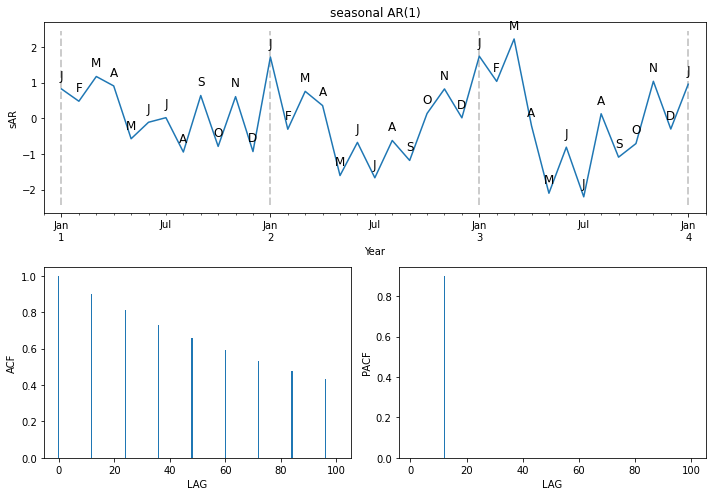

In [53]:
# Example 3.46
np.random.seed(666)
phi = np.array([*np.repeat(0, 11), -.9])
sAR = tsm.arima_process.arma_generate_sample(ar=[1, *phi], ma=[1, 0], nsample=37)
sAR = pd.Series(sAR, index=pd.period_range("0001", periods=len(sAR), freq="M"))

arma_process = tsm.arima_process.ArmaProcess(ar=[1, *phi], ma=[1, 0])
acf = arma_process.acf(lags=101)
pacf = arma_process.pacf(lags=101)
lags = np.arange(0, 101)

fig = plt.figure(figsize=(10, 7))
gs = GridSpec(nrows=2, ncols=2)

ax0 = fig.add_subplot(gs[0, :])
sAR.plot(axes=ax0)
ax0.set_xlim(ax0.get_xlim()[0] - 1, ax0.get_xlim()[1] + 1)
ax0.vlines(["0001-01", "0002-01", "0003-01", "0004-01"], ymin=ax0.get_ylim()[0],
           ymax=ax0.get_ylim()[1], linewidth=2, color="0.8", linestyle="--")
ax0.set_title("seasonal AR(1)")
ax0.set_xlabel("Year")
ax0.set_ylabel("sAR")

for x, y, label in zip(sAR.index, sAR, np.resize(["J","F","M","A","M","J","J","A","S","O","N","D"], 37)):
    ax0.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', size="large")

ax1 = fig.add_subplot(gs[1, 0])
ax1.bar(lags, acf, width=.4)
ax1.set_xlabel("LAG")
ax1.set_ylabel("ACF")

ax2 = fig.add_subplot(gs[1, 1])
ax2.bar(lags[1:], pacf[1:], width=.4)
ax2.set_xlabel("LAG")
ax2.set_ylabel("PACF")

fig.tight_layout()
plt.show()

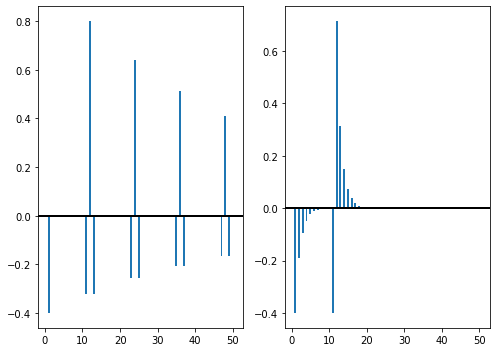

In [54]:
# Example 3.47
phi = np.array([*np.repeat(0, 11), -.8])
arma_process = tsm.arima_process.ArmaProcess(ar=[1, *phi], ma=[1, -.5])
acf = arma_process.acf(lags=51)[1:]
pacf = arma_process.pacf(lags=51)[1:]
lags = np.arange(1, 51)

fig, axes = plt.subplots(ncols=2, figsize=(7, 5))
axes[0].bar(lags, acf, width=.5)
axes[0].axhline(0, color="black", linewidth=2)

axes[1].bar(lags, pacf, width=.5)
axes[1].axhline(0, color="black", linewidth=2)

fig.tight_layout()
plt.show()

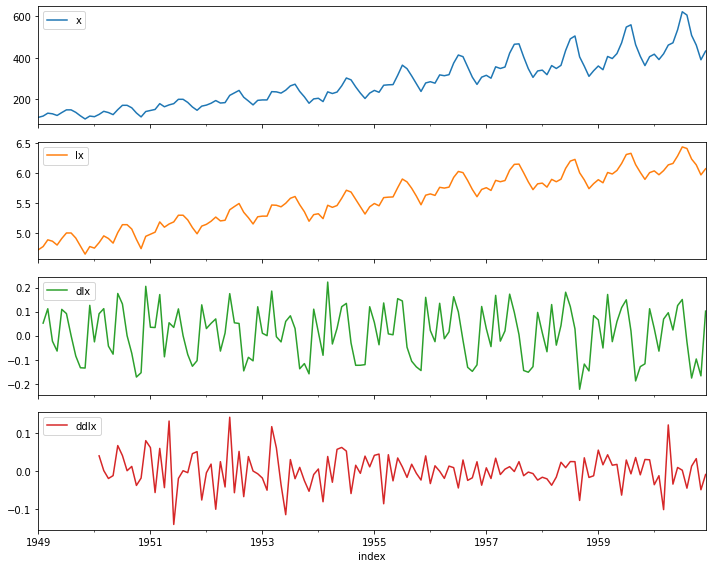

In [55]:
# Example 3.49
x = pd.read_csv("data/AirPassengers.csv", index_col=0, parse_dates=True)
x.index = x.index.to_period("M")
lx = x.apply(np.log)
dlx = lx.diff().dropna()
ddlx = dlx.diff(12).dropna()

df = pd.concat([x, lx, dlx, ddlx], axis=1)
df.columns = ["x", "lx", "dlx", "ddlx"]

df.plot(subplots=True, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [56]:
model_1 = sm.tsa.SARIMAX(lx, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend="c").fit()
print(model_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.968
Date:                            Tue, 18 May 2021   AIC                           -479.935
Time:                                    12:40:26   BIC                           -465.559
Sample:                                01-31-1949   HQIC                          -474.094
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.194      0.847      -0.002       0.001
ar.L1          0.1957      0.198   

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


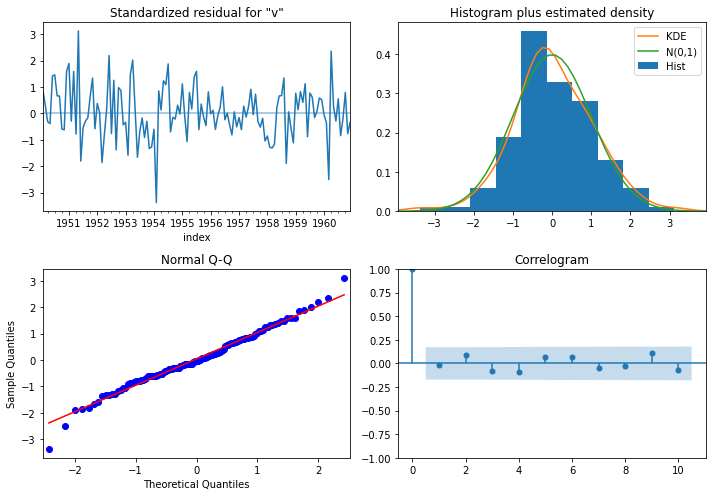

In [57]:
model_1.plot_diagnostics(figsize=(10, 7))
plt.tight_layout()
plt.show()

In [58]:
model_2 = sm.tsa.SARIMAX(lx, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), trend="c").fit()
print(model_2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.710
Date:                            Tue, 18 May 2021   AIC                           -481.421
Time:                                    12:40:28   BIC                           -469.920
Sample:                                01-31-1949   HQIC                          -476.747
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.157      0.875      -0.002       0.002
ma.L1         -0.4021      0.073   

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


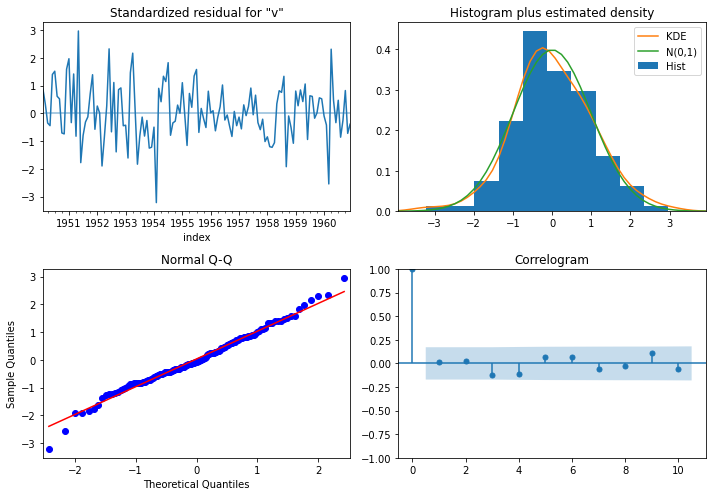

In [59]:
model_2.plot_diagnostics(figsize=(10, 7))
plt.tight_layout()
plt.show()

In [60]:
model_3 = sm.tsa.SARIMAX(lx, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12), trend="c").fit()
print(model_3.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                value   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 243.752
Date:                              Tue, 18 May 2021   AIC                           -479.505
Time:                                      12:40:31   BIC                           -468.004
Sample:                                  01-31-1949   HQIC                          -474.831
                                       - 12-31-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.002     -0.139      0.889      -0.004       0.003
ar.L1         -0.33

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


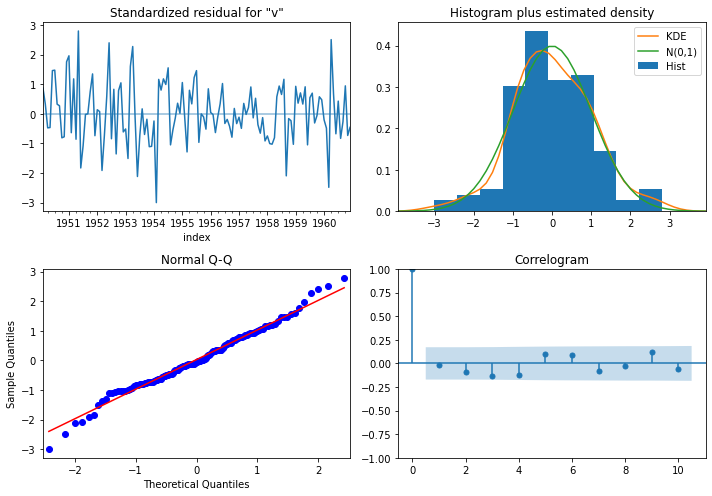

In [61]:
model_3.plot_diagnostics(figsize=(10, 7))
plt.tight_layout()
plt.show()

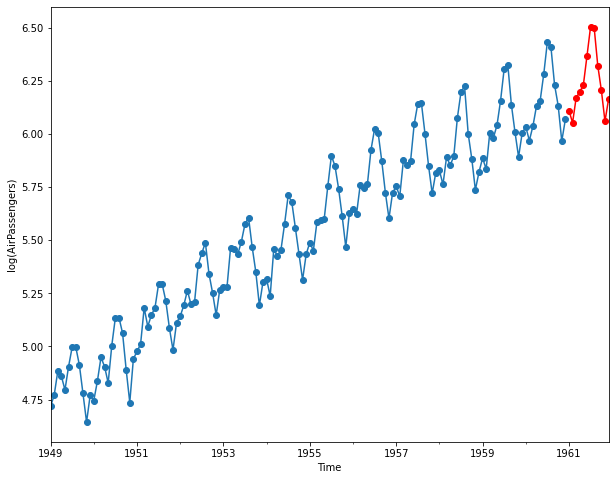

In [62]:
pred = model_2.predict(start=len(lx), end=len(lx) + 11)

lx.plot(xlabel="Time", ylabel="log(AirPassengers)", marker="o", figsize=(10, 8), legend=False)
pred.plot(marker="o", color="red")
plt.show()